In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('kaggle_data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df = df.loc[:, ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
0,221900.0,3,1.00,1180,5650
1,538000.0,3,2.25,2570,7242
2,180000.0,2,1.00,770,10000
3,604000.0,4,3.00,1960,5000
4,510000.0,3,2.00,1680,8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   sqft_lot     21613 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [5]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
dtype: int64

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06


In [7]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
price,1.000000,0.308350,0.525138,0.702035,0.089661
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000


In [8]:
#sns.pairplot(df, plot_kws={'alpha': 0.2})

<AxesSubplot:>

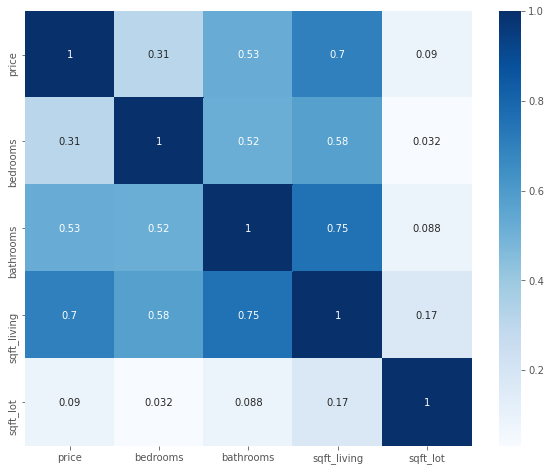

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

<AxesSubplot:>

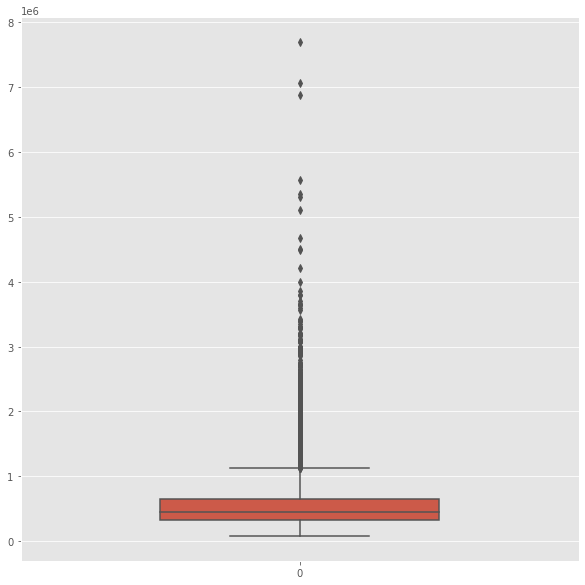

In [10]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df['price'], orient='v', width=0.5)

In [11]:
def outlier_std(df, thresh=3, columns=None):
    if columns == None:
        columns = df.columns
    
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        
        border = (np.abs(df[col] - mean)) / std
        
        df = df[border < thresh]
        
    return df

In [12]:
print('before', df.shape)
df = outlier_std(df, columns=['price'])
print('after', df.shape)

before (21613, 5)
after (21207, 5)


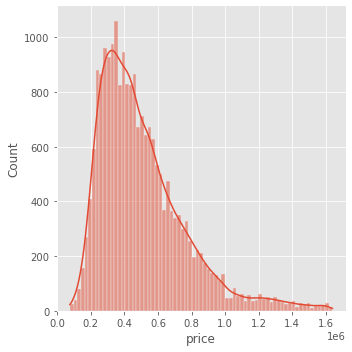

In [13]:
sns.displot(data=df, x=df['price'], kde=True)

In [14]:
df['price'] = np.log1p(df['price'])
df['price'].head()

0    12.309987
1    13.195616
2    12.100718
3    13.311331
4    13.142168
Name: price, dtype: float64

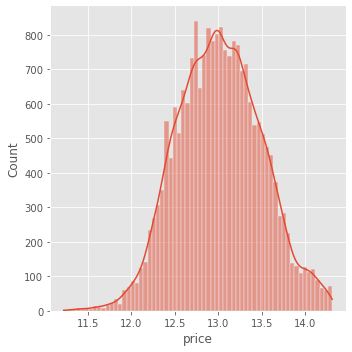

In [15]:
sns.displot(data=df, x=df['price'], kde=True)

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
for col in df.columns:
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(np.array(df[col].values).reshape(-1, 1))
    
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
0,-1.462456,-0.383902,-1.473660,-1.017868,-0.227292
1,0.366514,-0.383902,0.221846,0.642559,-0.187895
2,-1.894631,-1.469280,-1.473660,-1.507634,-0.119643
3,0.605485,0.701475,1.239150,-0.086118,-0.243377
4,0.256135,-0.383902,-0.117255,-0.420592,-0.167157
